# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and Exploratory Data Analysis. In order to complete this lab, you'll have to make import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
* Show mastery of the content covered in this section

## The Dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!

## Goals
* Use all available pandas knowledge to clean the dataset and deal with null values
* Use Queries and aggregations to group the data into interesting subsets as needed
* Use descriptive statistics and data visualization to find answers to questions we may have about the data. 

## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
def add_1(x):
    return x + 1

For this lab, our dataset is split among two different sources--`heroes_information.csv` and `super_hero_powers.csv`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the head of each to ensure that everything loaded correctly.  

In [2]:
def git_hello():
    print('hello git')

In [118]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')

In [184]:
heroes_df.head(20)

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
name,,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,122.0
Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,-,good,88.0
Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0
Agent Bob,Male,brown,Human,Brown,178.0,Marvel Comics,-,good,81.0
Agent Zero,Male,-,-,-,191.0,Marvel Comics,-,good,104.0


In [120]:
powers_df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [121]:
heroes_df.drop('Unnamed: 0', axis = 1, inplace = True)

In [122]:
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [123]:
heroes_df.describe()

,Height,Weight
count,734.000000,732.000000
mean,102.254087,43.855191
std,139.624543,130.823733
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,175.000000,62.000000
75%,185.000000,90.000000
max,975.000000,900.000000


## Familiarize Yourself With the Dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [124]:
heroes_df.shape

(734, 10)

In [125]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.4+ KB


In [126]:
heroes_df.isna().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [127]:
heroes_df.isna().sum().sum()

17

In [128]:
powers_df.shape

(667, 168)

In [129]:
powers_df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [66]:
trial_str = 'Reality warping'

In [71]:
trial_str.split()

['Reality', 'warping']

In [67]:
'Reality' in trial_str

True

In [68]:
'Reality' in list(powers_df.columns)

False

In [72]:
pd.Series(powers_df.columns)[pd.Series(powers_df.columns).apply(lambda x: x if 'Reality' in x  else 0 ) != 0]

159    Reality Warping
dtype: object

In [13]:
powers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


In [78]:
heroes_df.isna().sum().sort_values(ascending = False)

Publisher     15
Weight         2
Alignment      0
Skin color     0
Height         0
Hair color     0
Race           0
Eye color      0
Gender         0
name           0
dtype: int64

In [15]:
powers_df.isna().sum().sum()

0

## Dealing with Null Values

Starting in the cell below, detect and deal with any null values in either data frame.  Then, explain your methodology for detecting and dealing with outliers in the markdown section below.  Be sure to explain your strategy for dealing with null values in numeric columns, as well as your strategy for dealing with null values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________




In [79]:
heroes_df.describe()

,Height,Weight
count,734.000000,732.000000
mean,102.254087,43.855191
std,139.624543,130.823733
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,175.000000,62.000000
75%,185.000000,90.000000
max,975.000000,900.000000


In [130]:
heroes_df['Weight']

0      441.0
1       65.0
2       90.0
3      441.0
4      -99.0
5      122.0
6      -99.0
7       88.0
8       61.0
9       81.0
10     104.0
11     108.0
12      90.0
13      90.0
14     -99.0
15     -99.0
16      72.0
17     169.0
18     -99.0
19     173.0
20     101.0
21     -99.0
22      68.0
23     -99.0
24      57.0
25      54.0
26     -99.0
27      83.0
28      90.0
29     122.0
       ...  
704    162.0
705     95.0
706     54.0
707    108.0
708     67.0
709    158.0
710     50.0
711    -99.0
712    -99.0
713    -99.0
714     65.0
715    -99.0
716    117.0
717     39.0
718    473.0
719    135.0
720     51.0
721    171.0
722     74.0
723    -99.0
724    117.0
725     50.0
726     61.0
727     95.0
728     83.0
729     52.0
730    -99.0
731     17.0
732     57.0
733     81.0
Name: Weight, Length: 734, dtype: float64

In [18]:
heroes_df['Weight'].value_counts()

-99.0     237
 79.0      23
 54.0      23
 81.0      22
 90.0      19
 52.0      15
 86.0      15
 59.0      14
 56.0      13
 77.0      13
 61.0      13
 101.0     12
 50.0      12
 88.0      11
 63.0      11
 83.0      10
 95.0      10
 74.0      10
 65.0       9
 72.0       8
 68.0       8
 104.0      8
 135.0      8
 57.0       7
 97.0       7
 99.0       7
 117.0      6
 108.0      6
 55.0       5
 70.0       5
         ... 
 14.0       1
 356.0      1
 105.0      1
 324.0      1
 360.0      1
 236.0      1
 36.0       1
 140.0      1
 128.0      1
 248.0      1
 16.0       1
 45.0       1
 234.0      1
 96.0       1
 82.0       1
 76.0       1
 198.0      1
 116.0      1
 176.0      1
 170.0      1
 47.0       1
 78.0       1
 27.0       1
 25.0       1
 178.0      1
 132.0      1
 38.0       1
 412.0      1
 320.0      1
 855.0      1
Name: Weight, Length: 135, dtype: int64

In [83]:
def turn_to_null(x):
    if x == -99:
        x = np.nan

In [84]:
heroes_df['Weight'] = heroes_df['Weight'].apply(turn_to_null)

In [ ]:
heroes_df['Weight'] = heroes_df['Weight'].apply(lambda x: np.nan if x == -99 else x)

In [132]:
heroes_df.replace(-99, np.nan, inplace= True)

In [ ]:
heroes_df.loc[heroes_df['Weight'] == -99, 'Weight'] = np.nan

In [134]:
heroes_df['Weight'].fillna(heroes_df['Weight'].mean(), inplace = True)

In [135]:
heroes_df

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.000000
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.000000
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.000000
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.000000
4,Abraxas,Male,blue,Cosmic Entity,Black,NaN,Marvel Comics,-,bad,112.252525
5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,122.000000
6,Adam Monroe,Male,blue,-,Blond,NaN,NBC - Heroes,-,good,112.252525
7,Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,-,good,88.000000
8,Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.000000
9,Agent Bob,Male,brown,Human,Brown,178.0,Marvel Comics,-,good,81.000000


In [101]:
human_male_mask = (heroes_df['Gender'] == 'Male') & (heroes_df['Race'] == 'Human')

In [109]:
heroes_df[human_male_mask & (heroes_df['Eye color'] == 'blue')].set_index()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,None
1,Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,-,good,None
2,Alfred Pennyworth,Male,blue,Human,Black,178.0,DC Comics,-,good,None
3,Animal Man,Male,blue,Human,Blond,183.0,DC Comics,-,good,None
4,Ant-Man,Male,blue,Human,Blond,211.0,Marvel Comics,-,good,None
5,Ant-Man II,Male,blue,Human,Blond,183.0,Marvel Comics,-,good,None
6,Batman,Male,blue,Human,black,188.0,DC Comics,-,good,None
7,Batman,Male,blue,Human,Black,178.0,DC Comics,-,good,None
8,Batman II,Male,blue,Human,Black,178.0,DC Comics,-,good,None
9,Booster Gold,Male,blue,Human,Blond,196.0,DC Comics,-,good,None


In [ ]:
heroes_df.drop()

In [88]:
heroes_df.name.count()

734

In [136]:
heroes_df['Height'] = heroes_df['Height'].apply(lambda x: np.nan if x == -99 else x)

In [137]:
heroes_df['Height'].fillna(heroes_df['Height'].mean())

0      203.000000
1      191.000000
2      185.000000
3      203.000000
4      186.726306
5      193.000000
6      186.726306
7      185.000000
8      173.000000
9      178.000000
10     191.000000
11     188.000000
12     193.000000
13     180.000000
14     186.726306
15     186.726306
16     178.000000
17     244.000000
18     186.726306
19     257.000000
20     188.000000
21     186.726306
22     183.000000
23     186.726306
24     165.000000
25     163.000000
26     186.726306
27     183.000000
28     180.000000
29     211.000000
          ...    
704    183.000000
705    185.000000
706    180.000000
707    188.000000
708    173.000000
709    218.000000
710    163.000000
711    186.726306
712    186.726306
713    186.726306
714    178.000000
715    186.726306
716    175.000000
717    140.000000
718    366.000000
719    160.000000
720    165.000000
721    188.000000
722    183.000000
723    186.726306
724    196.000000
725    155.000000
726    175.000000
727    188.000000
728    183

In [138]:
heroes_df.dropna(inplace = True)

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [139]:
heroes_df.set_index('name', drop = True, inplace = True)

In [140]:
powers_df.rename(columns = {'hero_names' : 'name'}, inplace = True)

In [141]:
powers_df.set_index('name', inplace = True)

In [142]:
combined_df = pd.merge(heroes_df, powers_df, how = 'inner', left_index = True, right_index = True)

In [143]:
combined_df.head()

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,True,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,122.0,False,...,False,False,False,False,False,False,False,False,False,False


In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

In [144]:
male_df = combined_df[combined_df['Gender'] == 'Male']

In [145]:
male_df.head()

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,True,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,122.0,False,...,False,False,False,False,False,False,False,False,False,False


In [146]:
female_df = combined_df[combined_df['Gender'] == 'Female']

In [148]:
print(male_df['Gender'].value_counts()) 
female_df['Gender'].value_counts()

Male    339
Name: Gender, dtype: int64


Female    137
Name: Gender, dtype: int64

In [154]:
display(female_df.head())
display(male_df.head())

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
name,,,,,,,,,,,,,,,,,,,,,
Angel Dust,Female,yellow,Mutant,Black,165.0,Marvel Comics,-,good,57.0,True,...,False,False,False,False,False,False,False,False,False,False
Angel Salvadore,Female,brown,-,Black,163.0,Marvel Comics,-,good,54.0,False,...,False,False,False,False,False,False,False,False,False,False
Arachne,Female,blue,Human,Blond,175.0,Marvel Comics,-,good,63.0,True,...,True,False,False,False,False,False,False,False,False,False
Arclight,Female,violet,-,Purple,173.0,Marvel Comics,-,bad,57.0,False,...,False,False,False,False,False,False,False,False,False,False
Ardina,Female,white,Alien,Orange,193.0,Marvel Comics,gold,good,98.0,True,...,False,False,False,False,False,False,False,False,False,False


,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,True,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,122.0,False,...,False,False,False,False,False,False,False,False,False,False


## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [155]:
male_heroes_df = combined_df[combined_df['Gender'] == 'Male']
female_heroes_df = combined_df[combined_df['Gender'] == 'Female']

def show_distplot(dataframe, gender, column_name):
    return(sns.distplot(dataframe[column_name]))

In [162]:
new_df = male_df.copy()

In [163]:
hex(id(new_df))

'0x1a19792828'

In [164]:
hex(id(male_df))

'0x1a1f9b4128'

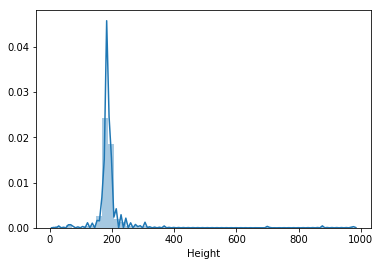

In [156]:
# Male Height
show_distplot(male_heroes_df, 'male', 'Height');

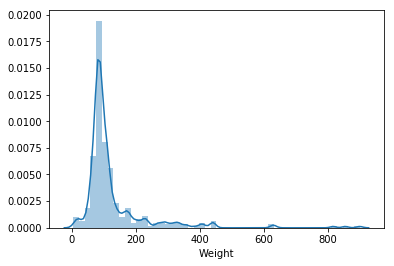

In [165]:
# Male Weight
show_distplot(male_heroes_df, 'male', 'Weight')

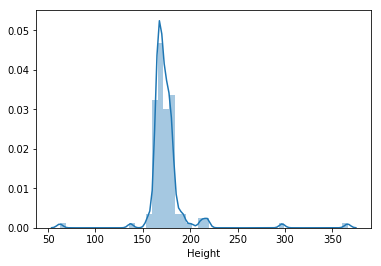

In [166]:
# Female Height
show_distplot(female_heroes_df, 'female', 'Height')

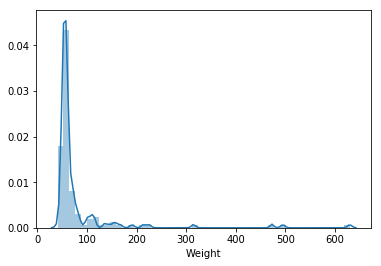

In [167]:
# Female Weight
show_distplot(female_heroes_df, 'female', 'Weight')

Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Wite your answer below this line:
____________________________________________________________________________________________________________________________



### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [37]:
combined_df.loc[:, 'Agility' : 'Omniscient'].sum().sort_values(ascending = False).head()

Super Strength    274
Stamina           228
Durability        207
Super Speed       198
Agility           194
dtype: int64

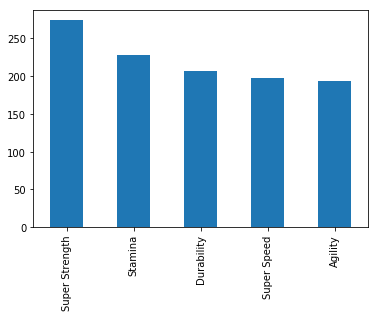

In [38]:
combined_df.loc[:, 'Agility' : 'Omniscient'].sum().sort_values(ascending = False).head().plot(kind = 'bar')

In [174]:
combined_df.groupby('Publisher').sum().loc['DC Comics'].sort_values(ascending = False)[2:7]

Super Strength    77.0
Stamina           68.0
Super Speed       61.0
Flight            61.0
Durability        58.0
Name: DC Comics, dtype: float64

In [39]:
combined_df.groupby('Publisher').sum().loc['DC Comics'].sort_values(ascending = False)

Height                          25105.5
Weight                          14378.0
Super Strength                     76.0
Stamina                            67.0
Super Speed                        61.0
Flight                             60.0
Agility                            58.0
Durability                         57.0
Intelligence                       51.0
Reflexes                           39.0
Stealth                            36.0
Marksmanship                       36.0
Accelerated Healing                35.0
Weapons Master                     32.0
Invulnerability                    31.0
Energy Blasts                      30.0
Longevity                          25.0
Force Fields                       25.0
Enhanced Hearing                   24.0
Enhanced Senses                    24.0
Energy Absorption                  19.0
Energy Constructs                  18.0
Weapon-based Powers                17.0
Self-Sustenance                    17.0
Telepathy                          16.0


In [183]:
combined_df.groupby('Publisher').mean()

,Height,Weight,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
Publisher,,,,,,,,,,,,,,,,,,,,,
DC Comics,181.046099,104.359983,0.411348,0.262411,0.056738,0.028369,0.078014,0.411348,0.262411,0.141844,...,0.000000,0.007092,0.000000,0.000000,0.007092,0.0000,0.0,0.007092,0.0,0.0
Dark Horse Comics,176.909091,101.818182,0.636364,0.454545,0.000000,0.000000,0.363636,0.727273,0.454545,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,0.0,0.0
George Lucas,183.916667,97.730640,0.666667,0.166667,0.000000,0.000000,0.000000,0.333333,0.583333,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,0.0,0.0
Image Comics,211.000000,405.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.0000,0.0,0.000000,0.0,0.0
J. R. R. Tolkien,279.000000,112.252525,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,0.0,0.0
Marvel Comics,191.381188,119.434043,0.392739,0.306931,0.000000,0.036304,0.075908,0.471947,0.148515,0.115512,...,0.049505,0.016502,0.006601,0.026403,0.000000,0.0033,0.0,0.000000,0.0,0.0
Microsoft,213.000000,112.252525,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,0.0,0.0
Rebellion,188.000000,112.252525,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,0.0,0.0
Shueisha,171.500000,64.500000,1.000000,0.750000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,0.0,0.0


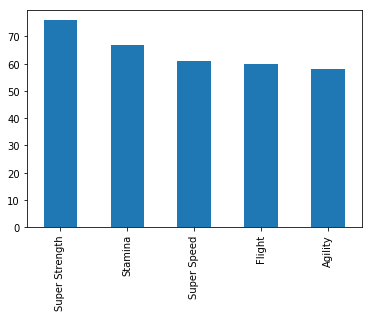

In [44]:
combined_df.groupby('Publisher').sum().loc['DC Comics'].sort_values(ascending = False)[2:7].plot(kind='bar')

In [40]:
combined_df.groupby('Publisher').sum().loc['Marvel Comics'].sort_values(ascending = False)

Height                          56889.2
Weight                          35515.0
Super Strength                    181.0
Stamina                           143.0
Durability                        140.0
Super Speed                       123.0
Agility                           118.0
Reflexes                           94.0
Accelerated Healing                92.0
Flight                             92.0
Energy Blasts                      76.0
Longevity                          55.0
Intelligence                       52.0
Telepathy                          47.0
Stealth                            44.0
Marksmanship                       44.0
Invulnerability                    43.0
Enhanced Senses                    40.0
Force Fields                       35.0
Psionic Powers                     35.0
Energy Absorption                  33.0
Weapons Master                     33.0
Natural Weapons                    32.0
Teleportation                      31.0
Toxin and Disease Resistance       29.0


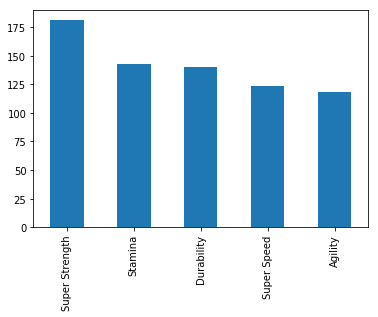

In [46]:
combined_df.groupby('Publisher').sum().loc['Marvel Comics'].sort_values(ascending = False)[2:7].plot(kind = 'bar')

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Wite your answer below this line:
____________________________________________________________________________________________________________________________


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data